In [21]:
import numpy as np 
import pandas as pd 
import os 

import matplotlib.pyplot as plt

# Import the biggest files to see what they look like 

In [49]:
person = pd.read_csv("Data/Person_Person.csv", sep = ";")
SO_detail = pd.read_csv("Data/Sales_SalesOrderDetail.csv", sep = ";")
SO_header = pd.read_csv("Data/Sales_SalesOrderHeader.csv", sep = ";")
SO_header_SalesReason = pd.read_csv("Data/Sales_SalesOrderHeaderSalesReason.csv", sep = ";")

### Person

In [10]:
person.head(5)

,BusinessEntityID,PersonType,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,EmailPromotion,AdditionalContactInfo,Demographics,rowguid,ModifiedDate
0,1,EM,False,NaN,Ken,J,Sánchez,NaN,0,NaN,"<IndividualSurvey xmlns=""http://schemas.micros...",92C4279F-1207-48A3-8448-4636514EB7E2,2009-01-07 00:00:00.000
1,2,EM,False,NaN,Terri,Lee,Duffy,NaN,1,NaN,"<IndividualSurvey xmlns=""http://schemas.micros...",D8763459-8AA8-47CC-AFF7-C9079AF79033,2008-01-24 00:00:00.000
2,3,EM,False,NaN,Roberto,NaN,Tamburello,NaN,0,NaN,"<IndividualSurvey xmlns=""http://schemas.micros...",E1A2555E-0828-434B-A33B-6F38136A37DE,2007-11-04 00:00:00.000
3,4,EM,False,NaN,Rob,NaN,Walters,NaN,0,NaN,"<IndividualSurvey xmlns=""http://schemas.micros...",F2D7CE06-38B3-4357-805B-F4B6B71C01FF,2007-11-28 00:00:00.000
4,5,EM,False,Ms.,Gail,A,Erickson,NaN,0,NaN,"<IndividualSurvey xmlns=""http://schemas.micros...",F3A3F6B4-AE3B-430C-A754-9F2231BA6FEF,2007-12-30 00:00:00.000


In [14]:
person.dtypes

BusinessEntityID          int64
PersonType               object
NameStyle                  bool
Title                    object
FirstName                object
MiddleName               object
LastName                 object
Suffix                   object
EmailPromotion            int64
AdditionalContactInfo    object
Demographics             object
rowguid                  object
ModifiedDate             object
dtype: object

In [13]:
person.shape

(19972, 13)

### Sales Order Detail

In [12]:
SO_detail.head()

,SalesOrderID,SalesOrderDetailID,CarrierTrackingNumber,OrderQty,ProductID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid,ModifiedDate
0,43659,1,4911-403C-98,1,776,1,2024.994,0.0,2024.994,B207C96D-D9E6-402B-8470-2CC176C42283,2011-05-31
1,43659,2,4911-403C-98,3,777,1,2024.994,0.0,6074.982,7ABB600D-1E77-41BE-9FE5-B9142CFC08FA,2011-05-31
2,43659,3,4911-403C-98,1,778,1,2024.994,0.0,2024.994,475CF8C6-49F6-486E-B0AD-AFC6A50CDD2F,2011-05-31
3,43659,4,4911-403C-98,1,771,1,2039.994,0.0,2039.994,04C4DE91-5815-45D6-8670-F462719FBCE3,2011-05-31
4,43659,5,4911-403C-98,1,772,1,2039.994,0.0,2039.994,5A74C7D2-E641-438E-A7AC-37BF23280301,2011-05-31


In [74]:
# SO_detail['ProductID'].value_counts().reset_index().sort_values(['index'])
# SO_detail[SO_detail['UnitPriceDiscount'] != 0][['OrderQty', 'UnitPrice', 'UnitPriceDiscount', 'LineTotal']].head() # probably in percentages
len(SO_detail['rowguid']) == len(np.unique(SO_detail['rowguid']))

True

In [16]:
SO_detail.dtypes

SalesOrderID               int64
SalesOrderDetailID         int64
CarrierTrackingNumber     object
OrderQty                   int64
ProductID                  int64
SpecialOfferID             int64
UnitPrice                float64
UnitPriceDiscount        float64
LineTotal                float64
rowguid                   object
ModifiedDate              object
dtype: object

In [17]:
SO_detail.shape

(121317, 11)

### Sales_SalesOrderHeader

In [19]:
SO_header.head()

,SalesOrderID,RevisionNumber,OrderDate,DueDate,ShipDate,Status,OnlineOrderFlag,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,...,CreditCardID,CreditCardApprovalCode,CurrencyRateID,SubTotal,TaxAmt,Freight,TotalDue,Comment,rowguid,ModifiedDate
0,43659,8,2011-05-31,2011-06-12,2011-06-07,5,False,SO43659,PO522145787,10-4020-000676,...,16281.0,105041Vi84182,NaN,20565.6206,1971.5149,616.0984,23153.2339,NaN,79B65321-39CA-4115-9CBA-8FE0903E12E6,2011-06-07
1,43660,8,2011-05-31,2011-06-12,2011-06-07,5,False,SO43660,PO18850127500,10-4020-000117,...,5618.0,115213Vi29411,NaN,1294.2529,124.2483,38.8276,1457.3288,NaN,738DC42D-D03B-48A1-9822-F95A67EA7389,2011-06-07
2,43661,8,2011-05-31,2011-06-12,2011-06-07,5,False,SO43661,PO18473189620,10-4020-000442,...,1346.0,85274Vi6854,4.0,32726.4786,3153.7696,985.5530,36865.8012,NaN,D91B9131-18A4-4A11-BC3A-90B6F53E9D74,2011-06-07
3,43662,8,2011-05-31,2011-06-12,2011-06-07,5,False,SO43662,PO18444174044,10-4020-000227,...,10456.0,125295Vi53935,4.0,28832.5289,2775.1646,867.2389,32474.9324,NaN,4A1ECFC0-CC3A-4740-B028-1C50BB48711C,2011-06-07
4,43663,8,2011-05-31,2011-06-12,2011-06-07,5,False,SO43663,PO18009186470,10-4020-000510,...,4322.0,45303Vi22691,NaN,419.4589,40.2681,12.5838,472.3108,NaN,9B1E7A40-6AE0-4AD3-811C-A64951857C4B,2011-06-07


In [106]:
# np.sum(SO_header['CreditCardID'].isna())

In [113]:
SO_header['TerritoryID'].value_counts()

9     6843
4     6224
1     4594
6     4067
10    3219
7     2672
8     2623
5      486
3      385
2      352
Name: TerritoryID, dtype: int64

In [84]:
SO_header.dtypes

SalesOrderID                int64
RevisionNumber              int64
OrderDate                  object
DueDate                    object
ShipDate                   object
Status                      int64
OnlineOrderFlag              bool
SalesOrderNumber           object
PurchaseOrderNumber        object
AccountNumber              object
CustomerID                  int64
SalesPersonID             float64
TerritoryID                 int64
BillToAddressID             int64
ShipToAddressID             int64
ShipMethodID                int64
CreditCardID              float64
CreditCardApprovalCode     object
CurrencyRateID            float64
SubTotal                  float64
TaxAmt                    float64
Freight                   float64
TotalDue                  float64
Comment                   float64
rowguid                    object
ModifiedDate               object
dtype: object

In [23]:
SO_header.shape

(31465, 26)

In [76]:
orderDate_freq = SO_header['OrderDate'].value_counts().reset_index()
orderDate_freq.columns = ['OrderDate', 'freq']
orderDate_freq = orderDate_freq.sort_values(by = ['OrderDate'])
orderDate_freq.head()

,OrderDate,freq
345,2011-05-31,43
1016,2011-06-01,4
956,2011-06-02,5
1104,2011-06-03,2
927,2011-06-04,5


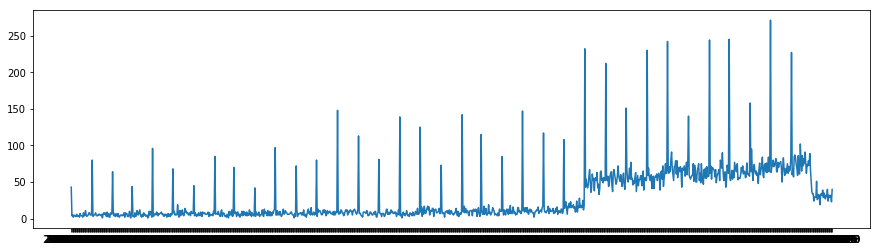

In [78]:
plt.figure(figsize = (15,4))
plt.plot(orderDate_freq.OrderDate, orderDate_freq.freq)
plt.show()

In [41]:
SO_header['OrderMonth'] = SO_header['OrderDate'].apply(lambda x: x[0:7])

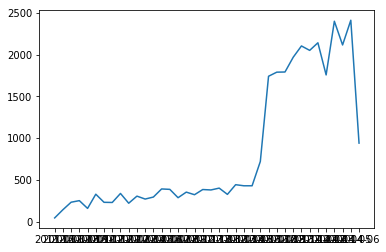

In [43]:
orderDate_freq = SO_header['OrderMonth'].value_counts().reset_index()
orderDate_freq.columns = ['OrderMonth', 'freq']
orderDate_freq = orderDate_freq.sort_values(by = ['OrderMonth'])
orderDate_freq.head()
plt.plot(orderDate_freq['OrderMonth'], orderDate_freq['freq'])
plt.show()

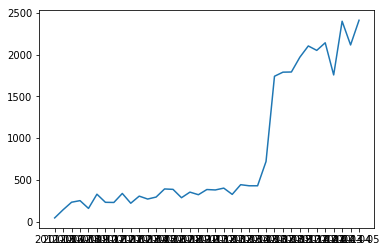

In [47]:
# plot without last month 
plt.plot(orderDate_freq['OrderMonth'][0:-1], orderDate_freq['freq'][0:-1])
plt.show()

### Sales Order Header Sales Reason

In [50]:
SO_header_SalesReason.head()

,SalesOrderID,SalesReasonID,ModifiedDate
0,43697,5,2011-05-31
1,43697,9,2011-05-31
2,43702,5,2011-06-01
3,43702,9,2011-06-01
4,43703,5,2011-06-01


In [115]:
SO_header_SalesReason['SalesReasonID'].value_counts()

1     17473
2      3515
5      1746
9      1551
10     1395
6      1245
4       722
Name: SalesReasonID, dtype: int64